In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR
from sklearn.linear_model import Ridge, LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [3]:
ret_df = pd.read_csv('retirement_prediction.csv')
ret_df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [4]:
ret_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
ret_df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [6]:
ret_df.describe(include='object')

,department,salary
count,14999,14999
unique,10,3
top,sales,low
freq,4140,7316


In [7]:
ret_df['salary'].value_counts(normalize=True, sort=False), ret_df['department'].value_counts(normalize=True, sort=False)

(low       0.487766
 medium    0.429762
 high      0.082472
 Name: salary, dtype: float64,
 sales          0.276018
 accounting     0.051137
 hr             0.049270
 technical      0.181345
 support        0.148610
 management     0.042003
 IT             0.081805
 product_mng    0.060137
 marketing      0.057204
 RandD          0.052470
 Name: department, dtype: float64)

<AxesSubplot:xlabel='department', ylabel='satisfaction_level'>

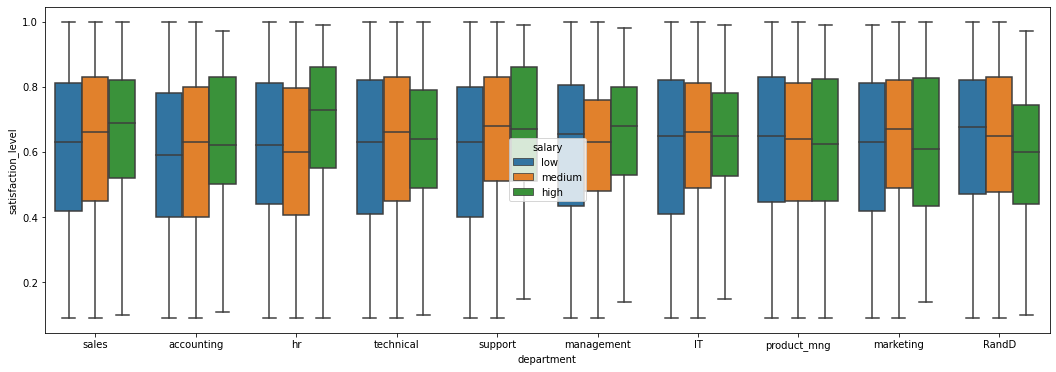

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(18, 6))
sns.boxplot(data=ret_df, x='department', y='satisfaction_level', hue='salary', ax=ax)

In [9]:
ret_df_pre1 = (ret_df
.assign(Work_accident=lambda df: df['Work_accident'].replace(dict(enumerate(['No', 'Yes']))))
.assign(promotion_last_5years=lambda df: df['promotion_last_5years'].replace(dict(enumerate(['No', 'Yes']))))
)
ret_df_pre1

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,No,1,No,sales,low
1,0.80,0.86,5,262,6,No,1,No,sales,medium
2,0.11,0.88,7,272,4,No,1,No,sales,medium
3,0.72,0.87,5,223,5,No,1,No,sales,low
4,0.37,0.52,2,159,3,No,1,No,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,No,1,No,support,low
14995,0.37,0.48,2,160,3,No,1,No,support,low
14996,0.37,0.53,2,143,3,No,1,No,support,low
14997,0.11,0.96,6,280,4,No,1,No,support,low


In [10]:
ret_df_encode = pd.get_dummies(ret_df_pre1)
ret_df_encode

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,left,Work_accident_No,Work_accident_Yes,promotion_last_5years_No,promotion_last_5years_Yes,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,1,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,1,1,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,1,1,0,1,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,1,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,1,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,1,1,0,1,0,...,0,0,0,0,0,1,0,0,1,0
14995,0.37,0.48,2,160,3,1,1,0,1,0,...,0,0,0,0,0,1,0,0,1,0
14996,0.37,0.53,2,143,3,1,1,0,1,0,...,0,0,0,0,0,1,0,0,1,0
14997,0.11,0.96,6,280,4,1,1,0,1,0,...,0,0,0,0,0,1,0,0,1,0


In [11]:
X_sat = ret_df_encode.loc[:, ['last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company',
       'Work_accident_No', 'Work_accident_Yes', 'promotion_last_5years_No',
       'promotion_last_5years_Yes', 'department_IT', 'department_RandD',
       'department_accounting', 'department_hr', 'department_management',
       'department_marketing', 'department_product_mng', 'department_sales',
       'department_support', 'department_technical', 'salary_high',
       'salary_low', 'salary_medium']].values
X_ret = ret_df_encode.loc[:, ['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company',
       'Work_accident_No', 'Work_accident_Yes', 'promotion_last_5years_No',
       'promotion_last_5years_Yes', 'department_IT', 'department_RandD',
       'department_accounting', 'department_hr', 'department_management',
       'department_marketing', 'department_product_mng', 'department_sales',
       'department_support', 'department_technical', 'salary_high',
       'salary_low', 'salary_medium']].values
y_sat = ret_df_encode.loc[:, 'satisfaction_level'].values
y_ret = ret_df_encode.loc[:, 'left'].values

In [12]:
X_sat_train, X_sat_test, y_sat_train, y_sat_test = train_test_split(X_sat, y_sat, random_state=0)

In [13]:
pipe = make_pipeline(SVR())
param_grid = {'svr__C':[0.001, 0.01, 0.1, 1, 10], 'svr__gamma':[0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(pipe, param_grid=param_grid, n_jobs=-1).fit(X_sat_train, y_sat_train)

In [14]:
grid.best_params_, grid.best_score_, grid.score(X_sat_test, y_sat_test)

({'svr__C': 0.1, 'svr__gamma': 0.1}, 0.3901812490748478, 0.38808939581931345)

In [15]:
ridge = Ridge(alpha=1).fit(X_sat_train, y_sat_train)
ridge.score(X_sat_train, y_sat_train), ridge.score(X_sat_test, y_sat_test)

(0.0638896453901886, 0.06254146483559597)

In [19]:
reg = LinearRegression().fit(X_sat_train, y_sat_train)
reg.score(X_sat_train, y_sat_train), reg.score(X_sat_test, y_sat_test)

(0.06389002579634517, 0.06254243902601209)

In [40]:
rfreg = RandomForestRegressor(n_estimators=100, max_depth=100, n_jobs=-1).fit(X_sat_train, y_sat_train)
rfreg.score(X_sat_train, y_sat_train), rfreg.score(X_sat_test, y_sat_test)

(0.9316833022324229, 0.5117810122039408)

In [41]:
X_ret_train, X_ret_test, y_ret_train, y_ret_test = train_test_split(X_ret, y_ret, random_state=0)

In [43]:
rfcls = RandomForestClassifier(n_estimators=100, n_jobs=-1).fit(X_ret_train, y_ret_train)
rfcls.score(X_ret_train, y_ret_train), rfcls.score(X_ret_test, y_ret_test)

(1.0, 0.9901333333333333)

In [61]:
logreg = LogisticRegression(max_iter=1000)
grid = GridSearchCV(logreg, param_grid={'C':[0.01, 0.1, 1, 10]}, scoring='roc_auc').fit(X_ret_train, y_ret_train)
grid.best_params_, grid.best_score_, grid.score(X_ret_test, y_ret_test), roc_auc_score(y_ret_test, grid.predict(X_ret_test))

({'C': 0.1}, 0.8193402386431021, 0.8280504507728705, 0.6114895456083247)

In [62]:
grid.best_estimator_.coef_.round(2)

array([[-3.65,  0.42, -0.27,  0.  ,  0.27,  0.4 , -0.96,  0.18, -0.74,
        -0.16, -0.48,  0.02,  0.22, -0.3 , -0.04, -0.09,  0.03,  0.11,
         0.12, -1.11,  0.54,  0.01]])

In [63]:
np.exp(grid.best_estimator_.coef_.round(2))

array([[0.02599113, 1.52196156, 0.76337949, 1.        , 1.30996445,
        1.4918247 , 0.38289289, 1.19721736, 0.47711392, 0.85214379,
        0.61878339, 1.02020134, 1.24607673, 0.74081822, 0.96078944,
        0.91393119, 1.03045453, 1.11627807, 1.12749685, 0.32955896,
        1.71600686, 1.01005017]])

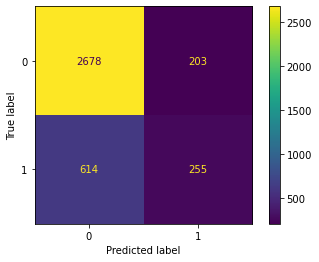

In [65]:
ConfusionMatrixDisplay.from_estimator(grid, X_ret_test, y_ret_test)

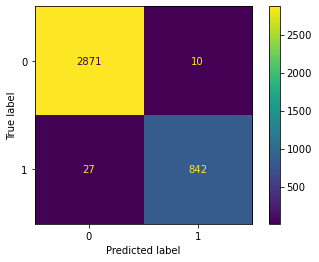

In [66]:
ConfusionMatrixDisplay.from_estimator(rfcls, X_ret_test, y_ret_test)

In [68]:
roc_auc_score(y_ret_test, rfcls.predict_proba(X_ret_test)[:, 1])

0.9946734467997743